With the generated data and PDE-FIND coefficients, we can visualize the results as done in the paper.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Loading the data for the PDE-FIND coefficients

In [10]:
FNU_coeffs1 = np.loadtxt('/scratch/martinaperez/ABM_data/FNU_coeffs1.txt')
FNU_coeffs50 = np.loadtxt('/scratch/martinaperez/ABM_data/FNU_coeffs50.txt')
FNB_coeffs1 = np.loadtxt('/scratch/martinaperez/ABM_data/FNB_coeffs1.txt')
FNB_coeffs50 = np.loadtxt('/scratch/martinaperez/ABM_data/FNB_coeffs50.txt')
FPU_coeffs1 = np.loadtxt('/scratch/martinaperez/ABM_data/FPU_coeffs1.txt')
FPU_coeffs50 = np.loadtxt('/scratch/martinaperez/ABM_data/FPU_coeffs50.txt')

For example, we can make a histogram to compare the empirical distribution of the PDE-FIND diffusion coefficients in the presence of different amounts of noise. 

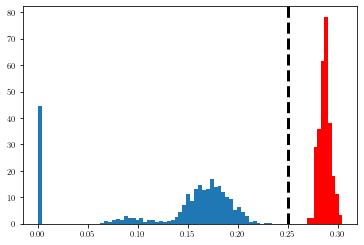

In [5]:
plt.hist(FNU_coeffs1[6,:],bins=60,density=True)
plt.hist(FNU_coeffs50[6,:],bins=10,color='red',density=True)
plt.axvline(0.25, color='k', linestyle='dashed', linewidth=3)
plt.show()

We can visualize the action of the rPCA method on the data.

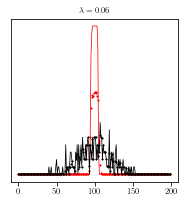

In [204]:
fig, ax = plt.subplots(figsize=(3,3))
plt.rcParams.update(tex_fonts)
plt.plot(Z3[:,0],'r*',markersize=1.5)
plt.plot(np.transpose(ud1[50])[:,0],linewidth=0.75,color='r')
plt.plot(Z3[:,499],'k*',markersize=1.5)
plt.plot(np.transpose(ud1[50])[:,499],linewidth=0.75,color='k')
plt.title(r'$\lambda=0.06$')
plt.yticks([])
plt.savefig('rPCA0_06',bbox_inches='tight',dpi=1000)
plt.show()

In [208]:
Z1, E1 = rp.RobustPCA(np.transpose(ud1[50]), lam_2 = 0.0175)
Z2, E2 = rp.RobustPCA(np.transpose(ud1[50]), lam_2 = 0.03)
Z3, E3 = rp.RobustPCA(np.transpose(ud1[50]), lam_2 = 0.035)
Z4, E4 = rp.RobustPCA(np.transpose(ud1[50]), lam_2 = 0.4)

for i in range(Z1.shape[1]):
    Z1[:,i] = 0.5*Z1[:,i]*(max(np.transpose(ud1[50])[:,i])/max(Z1[:,i]) + np.mean(np.transpose(ud1[50])[:,i])/np.mean(Z1[:,i]))
    
for i in range(Z2.shape[1]):
    Z2[:,i] = 0.5*Z2[:,i]*(max(np.transpose(ud1[50])[:,i])/max(Z2[:,i]) + np.mean(np.transpose(ud1[50])[:,i])/np.mean(Z2[:,i]))
    
for i in range(Z3.shape[1]):
    Z3[:,i] = 0.5*Z3[:,i]*(max(np.transpose(ud1[50])[:,i])/max(Z3[:,i]) + np.mean(np.transpose(ud1[50])[:,i])/np.mean(Z3[:,i]))
    
for i in range(Z4.shape[1]):
    Z4[:,i] = 0.5*Z4[:,i]*(max(np.transpose(ud1[50])[:,i])/max(Z4[:,i]) + np.mean(np.transpose(ud1[50])[:,i])/np.mean(Z4[:,i]))
    

iteration:1, err:638.2409280164466, nc_norm:215.80014755850502 eta1:0.038607681829027136
iteration:50, err:11.39819160275417, nc_norm:49.144307614234506 eta1:4.1201715432885715
iteration:100, err:0.09684695221271118, nc_norm:21.916000113395775 eta1:483.67045147729783
iteration:150, err:0.0008252031689574372, nc_norm:21.680739751496155 eta1:56778.48681162752
iteration:197, err:9.357000394409171e-06, nc_norm:21.67874131152919 eta1:5007719.753595425
iteration:1, err:394.8425638371349, nc_norm:278.1710642205513 eta1:0.038607681829027136
iteration:50, err:6.1415085063208545, nc_norm:58.06046857460736 eta1:4.1201715432885715
iteration:100, err:0.0519507537244622, nc_norm:30.933310183681577 eta1:483.67045147729783
iteration:150, err:0.00044372118485478524, nc_norm:30.701203488310192 eta1:56778.48681162752
iteration:190, err:9.799625347844944e-06, nc_norm:30.699245779296927 eta1:2569752.045381766
iteration:1, err:394.8008691296007, nc_norm:282.8304330525972 eta1:0.038607681829027136
iteration:

And we can show the rescaled rPCA with a fixed value of $\lambda$.

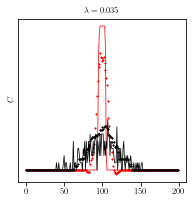

In [211]:
fig, ax = plt.subplots(figsize=(3,3))
plt.rcParams.update(tex_fonts)
plt.plot(Z3[:,0],'r*',markersize=1.5)
plt.plot(np.transpose(ud1[50])[:,0],linewidth=0.75,color='r')
plt.plot(Z3[:,499],'k*',markersize=1.5)
plt.plot(np.transpose(ud1[50])[:,499],linewidth=0.75,color='k')
plt.title(r'$\lambda=0.035$')
plt.ylabel(r'$C$')
plt.yticks([])
plt.savefig('rrPCA0_035',bbox_inches='tight',dpi=1000)
plt.show()

Using a scatterplot, we can show the joint empirical distribution of different parameters to identify important correlations.

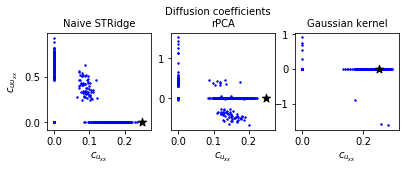

In [93]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
#plt.rcParams.update(tex_fonts)
fig.suptitle('Diffusion coefficients',fontsize=10)
plt.gcf().set_size_inches(6.3,2)
fig.subplots_adjust(top=0.8)

ax1.set_title('Naive STRidge',fontsize=10)
ax1.scatter(FNU_coeffs1[6,:],FNU_coeffs1[7,:],marker ='o', color='b',s=2)
ax1.scatter(0.25,0,marker='*',color='k',s=75)
ax1.set_ylabel(r'$c_{uu_{xx}}$',fontsize=10)
ax1.set_xlabel(r'$c_{u_{xx}}$')

ax2.set_title('rPCA',fontsize=10)
ax2.scatter(FNU_robust[6,:],FNU_robust[7,:],marker ='o', color='b',s=2)
ax2.scatter(0.25,0,marker='*',color='k',s=75)
ax2.set_xlabel(r'$c_{u_{xx}}$')

ax3.set_title('Gaussian kernel',fontsize=10)
ax3.scatter(FNU_smooth[6,:],FNU_smooth[7,:],marker ='o', color='b',s=2)
ax3.scatter(0.25,0,marker='*',color='k',s=75)
ax3.set_xlabel(r'$c_{u_{xx}}$')

plt.savefig('joint_distributions',bbox_inches='tight',dpi=1000)
plt.show()

With the commands below we can extract information about the fitted temporal derivatives by PDE-FIND. We pick specific replicates that we chose in the paper and see how the predicted temporal derivatives look compared to the observed temporal derivatives. 

In [6]:
U792 = np.transpose(FNU[792])
U765 = np.transpose(FNU[765])
U101 = np.transpose(FNB[101])
U089 = np.transpose(FNB[89])
U415 = np.transpose(FPU[415])
U428 = np.transpose(FPU[428])

In [7]:
#extract time derivatives
dt=2
dx =1

#Unbiased
Ut792, R792, rhs_des792 = build_linear_system(U792,dt,dx,D=2,P=2,time_diff = 'poly',deg_x =4)
Ut765, R765, rhs_des765 = build_linear_system(U765,dt,dx,D=2,P=2,time_diff = 'poly',deg_x =4)

#Biased
Ut101, R101, rhs_des101 = build_linear_system(U101,dt,dx,D=2,P=2,time_diff = 'poly',deg_x =4)
Ut089, R089, rhs_des089 = build_linear_system(U089,dt,dx,D=2,P=2,time_diff = 'poly',deg_x =4)

#Proliferation
Ut415, R415, rhs_des415 = build_linear_system(U415,dt,dx,D=2,P=2,time_diff = 'poly',deg_x =4)
Ut428, R428, rhs_des428 = build_linear_system(U428,dt,dx,D=2,P=2,time_diff = 'poly',deg_x =4)

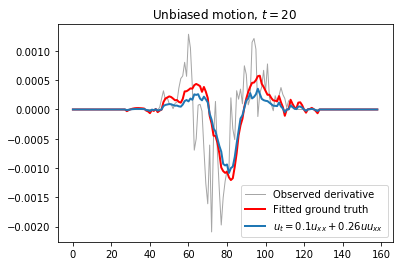

In [62]:
observation = Ut792[3200:3359]
ground_truth = 0.25*R792[3200:3359,6]
fitted = 0.10359399*R792[3200:3359,6]+0.26028285*R792[3200:3359,7]

plt.plot(observation,color='grey',linewidth=1,alpha=0.7,label='Observed derivative')
plt.plot(ground_truth,linewidth=2,color='red',label='Fitted ground truth')
plt.plot(fitted,linewidth=2,label=r'$u_t = 0.1u_{xx}+0.26uu_{xx}$')
plt.title(r'Unbiased motion, $t=20$')
plt.legend()
plt.savefig('dunbiased1a',bbox_inches='tight',dpi=1000)
plt.show()

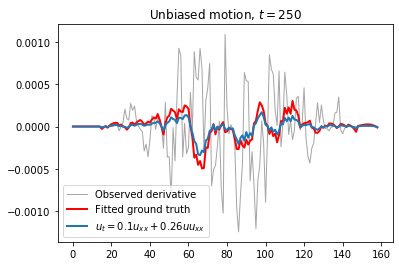

In [63]:
observation = Ut792[40000:40159]
ground_truth = 0.25*R792[40000:40159,6]
fitted = 0.10359399*R792[40000:40159,6]+0.26028285*R792[40000:40159,7]

plt.plot(observation,color='grey',linewidth=1,alpha=0.7,label='Observed derivative')
plt.plot(ground_truth,linewidth=2,color='red',label='Fitted ground truth')
plt.plot(fitted,linewidth=2,label=r'$u_t = 0.1u_{xx}+0.26uu_{xx}$')
plt.title(r'Unbiased motion, $t=250$')
plt.legend()
plt.savefig('dunbiased1b',bbox_inches='tight',dpi=1000)
plt.show()

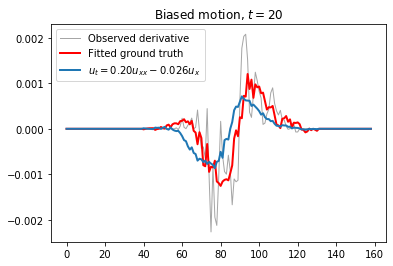

In [68]:
observation = Ut089[3200:3359]
ground_truth = -0.0375*R089[3200:3359,3] + 0.075*R089[3200:3359,4] + 0.25*R089[3200:3359,6]
fitted = -0.02636034*R089[3200:3359,3] + 0.19909815*R089[3200:3359,7]

plt.plot(observation,color='grey',linewidth=1,alpha=0.7,label='Observed derivative')
plt.plot(ground_truth,linewidth=2,color='red',label='Fitted ground truth')
plt.plot(fitted,linewidth=2,label=r'$u_t = 0.20u_{xx}-0.026u_x$')
plt.title(r'Biased motion, $t=20$')
plt.legend()
plt.savefig('dbiased2a',bbox_inches='tight',dpi=1000)
plt.show()

It is also possible to extract information about the number of zero and nonzero estimated parameters, to estimate the marginals needed for ABC methods. 

In [76]:
FNU_coeffs1 = np.loadtxt('/scratch/martinaperez/ABM_data/FNU_coeffs1.txt')

In [96]:
whereBothZero = []
whereNonZero = []
whereDiff = []
whereUdiff = []

for i in range(1000):
    if FNU_coeffs1[6,i]==0 and FNU_coeffs1[7,i]==0:
        whereBothZero.append(i)
    
    if FNU_coeffs1[6,i]!=0 and FNU_coeffs1[7,i]!=0:
        whereNonZero.append(i)
    
    if FNU_coeffs1[6,i]!=0 and FNU_coeffs1[7,i]==0:
        whereDiff.append(i)
    
    if FNU_coeffs1[6,i]==0 and FNU_coeffs1[7,i]!=0:
        whereUdiff.append(i)

whereBothZero = np.array(whereBothZero)        
whereNonZero = np.array(whereNonZero)
whereDiff = np.array(whereDiff)
whereUdiff = np.array(whereUdiff)

From the output file we obtain using Pakman, it is possible to create scatterplots to visualize the resulting posterior distribution.

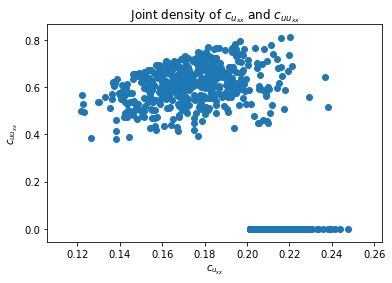

In [5]:
import sys

inputfile = 'python-abc-rejection-FNU1.txt'

# Process header
if type(inputfile) == str:
    inputfile = open(inputfile, 'r')
header = inputfile.readline()

# Process data

diff_array = []
udiff_array = []

for line in inputfile:
    linesplit = line.split(',')
    diff_array.append(float(linesplit[0]))
    udiff_array.append(float(linesplit[1]))

diff_array = np.array(diff_array)
udiff_array = np.array(udiff_array)


# Plot histogram
plt.scatter(diff_array,udiff_array)
plt.title(r'Joint density of $c_{u_{xx}}$ and $c_{uu_{xx}}$')
plt.xlabel(r"$c_{u_{xx}}$")
plt.ylabel(r"$c_{uu_{xx}}$")

inputfile.close()

We can compare this posterior distribution with the original data obtained using naive STRidge on the complete data set. Blue: original STRidge coefficients. Orange: ABC posterior using a large tolerance. All mass on the horizontal ($c_{uu_{xx}}$) axis vanishes.

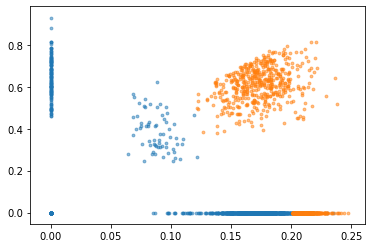

In [17]:
plt.scatter(FNU_coeffs1[6,:],FNU_coeffs1[7,:],alpha=0.5,s=8)
plt.scatter(diff_array,udiff_array,alpha=0.5,s=8)